<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [448]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [449]:
# Answer: 979, 6
movies.shape

(979, 6)

#### Check the data type of each column.

In [450]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [451]:
# Answer: 120.979
movies.loc[:, 'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [452]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

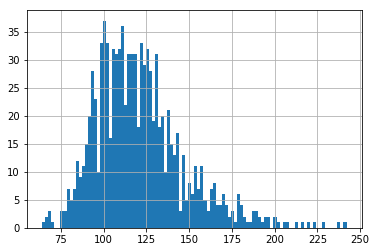

In [453]:
# Answer:
ax = movies.loc[:, 'duration'].hist(bins = 100);

#### Use a box plot to display that same data.

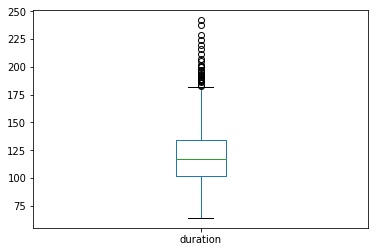

In [454]:
# Answer:
movies.loc[:, 'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [455]:
# Answer:
print(movies.groupby('content_rating').count())
movie_ratings = movies.loc[:, 'content_rating'].value_counts()

                star_rating  title  genre  duration  actors_list
content_rating                                                  
APPROVED                 47     47     47        47           47
G                        32     32     32        32           32
GP                        3      3      3         3            3
NC-17                     7      7      7         7            7
NOT RATED                65     65     65        65           65
PASSED                    7      7      7         7            7
PG                      123    123    123       123          123
PG-13                   189    189    189       189          189
R                       460    460    460       460          460
TV-MA                     1      1      1         1            1
UNRATED                  38     38     38        38           38
X                         4      4      4         4            4


#### Use a visualization to display that same data, including a title and x and y labels.

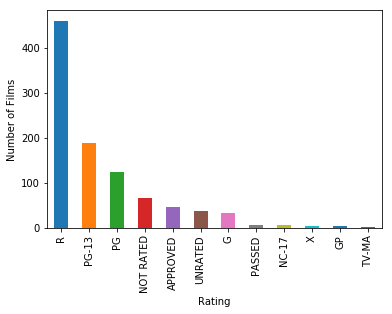

In [456]:
# Answer:
ax = movie_ratings.plot(kind = 'bar')
ax.set_ylabel('Number of Films')
ax.set_xlabel('Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [457]:
# Answer:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace = True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [458]:
# Answer:
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace = True)
movies.loc[:, ['title', 'content_rating']]

,title,content_rating
0,The Shawshank Redemption,R
1,The Godfather,R
2,The Godfather: Part II,R
3,The Dark Knight,PG-13
4,Pulp Fiction,R
5,12 Angry Men,UNRATED
6,"The Good, the Bad and the Ugly",UNRATED
7,The Lord of the Rings: The Return of the King,PG-13
8,Schindler's List,R
9,Fight Club,R


#### Count the number of missing values in each column.

In [459]:
# Answer: 3
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [460]:
# Answer:
movies.iloc[187,2] = 'PG'
movies.iloc[649,2] = 'PG'
movies.iloc[936,2] = 'G'
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

Normally would look for programmatic solution, but this was a small set with easily attainable values

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [461]:
# Answer:
long_movies = movies.loc[:, 'duration']>=120
lm_star_rating = movies.loc[long_movies,'star_rating'].mean()
short_movies = movies.loc[:, 'duration']<120 
sm_star_rating = movies.loc[short_movies,'star_rating'].mean()

print('Long movies have an average star rating of {}, whereas short movies have an average star rating of {}.'.format(
    lm_star_rating, sm_star_rating))

Long movies have an average star rating of 7.948898678414082, whereas short movies have an average star rating of 7.838666666666657.


#### Use a visualization to detect whether there is a relationship between duration and star rating.

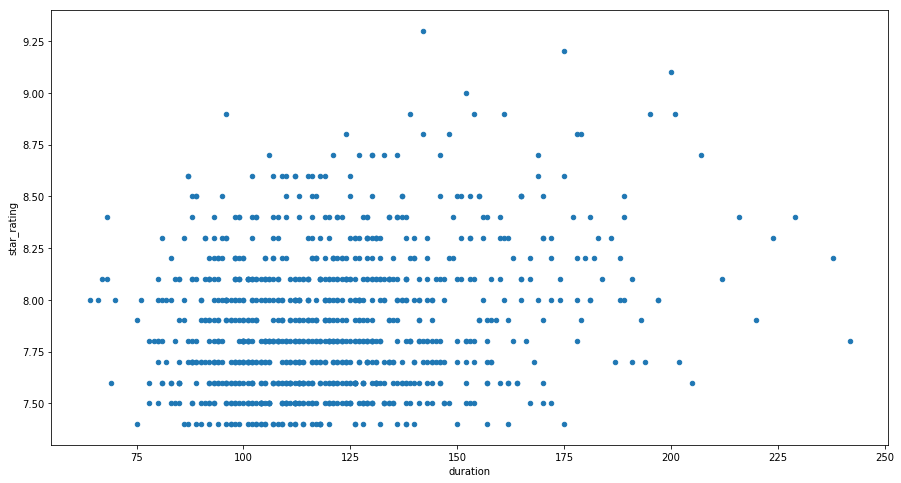

In [462]:
# Answer:
ax = movies.loc[:,['duration','star_rating']].plot(
    kind = 'scatter',
    x = 'duration', 
    y = 'star_rating',  
    figsize = (15,8)
)

#### Calculate the average duration for each genre.

In [463]:
# Answer:
genre_group = movies.groupby('genre')
genre_group.duration.mean().sort_values(ascending = False)

genre
Western      136.666667
Adventure    134.840000
Biography    131.844156
Drama        126.539568
Action       126.485294
Crime        122.298387
Mystery      115.625000
Thriller     114.200000
Fantasy      112.000000
Sci-Fi       109.000000
Comedy       107.602564
Family       107.500000
Horror       102.517241
Film-Noir     97.333333
Animation     96.596774
History       66.000000
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

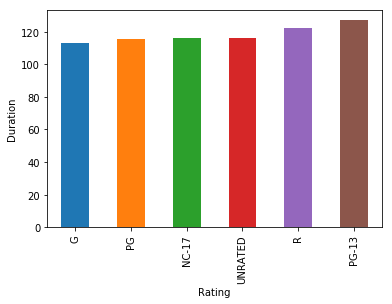

In [464]:
# Answer:
ax = movies.groupby('content_rating').duration.mean().sort_values().plot(kind = 'bar')
ax.set_ylabel('Duration')
ax.set_xlabel('Rating');

#### Determine the top rated movie (by star rating) for each genre.

In [465]:
# Answer:
movies.groupby('genre').max().drop(columns = ['content_rating', 'actors_list', 'duration'])

,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [466]:
# Answer:
dup_check = movies.title.duplicated().sum()
dup_count = movies.sort_values(by = 'title').duplicated().sum()

print('{} titles contain duplicate values. {} of these are actual duplicates.'.format(dup_check, dup_count))

4 titles contain duplicate values. 0 of these are actual duplicates.


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [467]:
# Answer:
# popular_genre = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror', 'Mystery']
# star_ratings = movies.groupby('genre').mean().drop(columns = ['duration'])
# star_ratings.loc[popular_genre,:]

popular_genre = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror', 'Mystery']
star_agg = movies.groupby('genre')['star_rating'].mean()
star_agg[popular_genre]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [468]:
# Answer:
# vc_genre = movies['genre'].value_counts()
# star_ratings = movies.groupby('genre').mean().drop(columns = ['duration'])
# star_ratings.loc[vc_genre > 10]

vc_genre = movies['genre'].value_counts()
star_agg = movies.groupby('genre')['star_rating'].mean()
star_agg[vc_genre > 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [469]:
# Answer:
# bool_genre = movies['genre'].value_counts()>10
# star_ratings = movies.groupby('genre').mean().drop(columns = ['duration'])
# star_ratings.loc[bool_genre,:]

bool_genre = movies['genre'].value_counts()>10
star_agg = movies.groupby('genre')['star_rating'].mean()
star_agg[bool_genre]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [470]:
# Answer:
mv_agg = movies.groupby('genre')['star_rating'].agg(['mean', 'count'])
mv_agg.loc[(mv_agg['count']>10),:]

,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Horror,7.806897,29
Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

In [471]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    979 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [472]:
movies[['title','actors_list']].count()

title          979
actors_list    979
dtype: int64

In [473]:
actors = movies['actors_list']
print(type(actors))
movies[['title', 'actors_list']].count()
actors.value_counts().head()

<class 'pandas.core.series.Series'>


[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']        6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']          3
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']    2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                  2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']     2
Name: actors_list, dtype: int64

In [474]:
print(actors.head())
movies.head(5)

0    [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1      [u'Marlon Brando', u'Al Pacino', u'James Caan']
2    [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4    [u'John Travolta', u'Uma Thurman', u'Samuel L....
Name: actors_list, dtype: object


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [475]:
#Name cleaning function for actors
print(actors[0])
import re

#pattern = re.compile("^\s+|\s*,\s*|\s+$")

def listClean(dirty_str):
    
    clean_str = dirty_str.replace("u'","")
    clean_str = clean_str.replace('u"',"")
    clean_str = clean_str.replace('"',"")
    clean_str = clean_str.replace("'","")
    clean_str = clean_str.replace("[","")
    clean_str = clean_str.replace("]","")
    
    clean_list = clean_str.split(", ")
    return clean_list

print(listClean(actors[0]))
type(listClean(actors[0]))


[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']
['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']


list

In [488]:
#clean actor list and convert to analysis dataframe
alist = []
for x in actors:
     alist += listClean(x)
actorAnFrame = pd.DataFrame({'actor': []})
for actor_list in alist:
    clean_al = "".join(listClean(actor_list))
    actorAnFrame = actorAnFrame.append({'actor': clean_al}, ignore_index=True)
actorAnFrame.head()

,actor
0,Tim Robbins
1,Morgan Freeman
2,Bob Gunton
3,Marlon Brando
4,Al Pacino


In [480]:
#Create dataframe for actors compatible with movies dataframe
actorFrame = pd.DataFrame({'actor1': [], 'actor2': [], 'actor3': []})
for actor_list in actors:
    clean_al = listClean(actor_list)
    actorFrame = actorFrame.append({'actor1': clean_al[0],'actor2': clean_al[1], 'actor3': clean_al[2]}, ignore_index=True)
actorFrame.info()
actorFrame.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 3 columns):
actor1    979 non-null object
actor2    979 non-null object
actor3    979 non-null object
dtypes: object(3)
memory usage: 23.0+ KB


,actor1,actor2,actor3
0,Tim Robbins,Morgan Freeman,Bob Gunton
1,Marlon Brando,Al Pacino,James Caan
2,Al Pacino,Robert De Niro,Robert Duvall
3,Christian Bale,Heath Ledger,Aaron Eckhart
4,John Travolta,Uma Thurman,Samuel L. Jackson


In [477]:
#analyze new dataFrame for consistency with existing data

print(movies['actors_list'].head())
print(actorFrame.head())
print(movies['actors_list'].tail())
print(actorFrame.tail())

0    [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1      [u'Marlon Brando', u'Al Pacino', u'James Caan']
2    [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4    [u'John Travolta', u'Uma Thurman', u'Samuel L....
Name: actors_list, dtype: object
           actor1          actor2             actor3
0     Tim Robbins  Morgan Freeman         Bob Gunton
1   Marlon Brando       Al Pacino         James Caan
2       Al Pacino  Robert De Niro      Robert Duvall
3  Christian Bale    Heath Ledger      Aaron Eckhart
4   John Travolta     Uma Thurman  Samuel L. Jackson
974    [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...
975    [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...
976    [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...
977    [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...
978    [u'Charlie Sheen', u'Michael Douglas', u'Tamar...
Name: actors_list, dtype: object
              actor1             actor2            actor

In [478]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [479]:
#merge the data frames
movieFrame = pd.concat([movies, actorFrame], axis=1, join='inner')
movieFrame = movieFrame.drop(columns = 'actors_list')
movieFrame.head()

,star_rating,title,content_rating,genre,duration,actor1,actor2,actor3
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson


In [522]:
act_val = actorAnFrame.loc[:, 'actor'].value_counts()
print('Top 10 most frequent actors: \n\n', act_val.head(10))

Top 10 most frequent actors: 

 Robert De Niro       18
Clint Eastwood       14
Tom Hanks            14
Brad Pitt            14
Al Pacino            13
Johnny Depp          12
Christian Bale       11
Dustin Hoffman       11
Leonardo DiCaprio    11
Harrison Ford        10
Name: actor, dtype: int64
